# Extended Time Series Comparison of Transport Plots for Presentation
*Akira Di Sandro, 8/3/20*
<br> In this notebook, I will be plotting a time series of the transport comparison between model and observational data of the first 100 m of depth where the observational data will be limited to July 2012 - March 2014, but the model data will be plotted from 1984-2014 (30 years). These plots will have the means and standard deviations on them for the presentation.

## 1. Import Packages as usual

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import sectionate
import csv

In [3]:
times1 = []
for i in range(2012,2015):
    for j in range(1,13):
        if i == 2012 and j >= 7:
            times1 = np.append(times1, dt.datetime(2012,j,1))
        elif i ==2013:
            times1 = np.append(times1, dt.datetime(2013,j,1))
        elif i == 2014 and j <= 3:
            times1 = np.append(times1, dt.datetime(2014,j,1))
            
times1.shape

(21,)

In [4]:
times2 = []
for i in range(1984,2015):
    for j in range(1,13):
        if i == 1984 and j >= 4:
            times2 = np.append(times2, dt.datetime(1984,j,1))
        elif i == 2014 and j <= 3:
            times2 = np.append(times2, dt.datetime(2014,j,1))
        elif i == 1984 and j < 4:
            pass
        elif i == 2014 and j > 3:
            pass
        else:
            times2 = np.append(times2, dt.datetime(i,j,1))
            
times2.shape

(360,)

In [5]:
times4 = []
for i in range(len(times2)):
    if i%36 == 0:
        times4 = np.append(times4,times2[i])

In [6]:
times4l = []
for i in times4:
    times4l = np.append(times4l,i.strftime('%Y'))
times4l

array(['1984', '1987', '1990', '1993', '1996', '1999', '2002', '2005',
       '2008', '2011'], dtype='<U32')

## 0-100m Plot

In [7]:
model_trans = np.array([])
obs_trans = np.array([])
count = 0
with open('Data Files/mtrans0-100.csv', 'r', newline='') as f:
    reader = csv.reader(f)
    
    for row in reader:
        model_trans = np.append(model_trans,row[2])
        
        if count>339:
            obs_trans = np.append(obs_trans,row[3])
        
        count+=1

In [8]:
model_trans = np.asarray(model_trans[1:], dtype=np.float64, order='C')
obs_trans = np.asarray(obs_trans, dtype=np.float64, order='C')

In [9]:
modelmean = round(model_trans.mean(),3)
modelstd = round(model_trans.std(),3)
obsmean = round(obs_trans.mean(),3)
obsstd = round(obs_trans.std(),3)

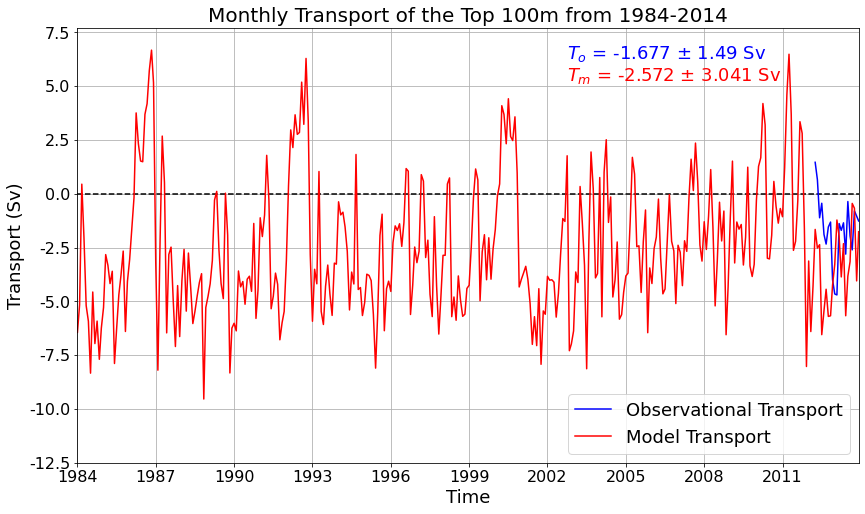

In [10]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set_ylabel('Transport (Sv)', fontsize=18)
ax.set_xlabel('Time', fontsize=18)
label1 = 'Observational Transport'
label2 = 'Model Transport'
ax.plot([times2[0],times2[-1]], [0,0], 'k--')
ax.plot(times1, obs_trans, 'b', label=label1)
ax.plot(times2, model_trans, 'r', label=label2)
ax.text(times2[225], 6.25, f'$T_o$ = {obsmean} $\pm$ {obsstd} Sv', color='b', fontsize=18)
ax.text(times2[225], 5.25, f'$T_m$ = {modelmean} $\pm$ {modelstd} Sv', color='r', fontsize=18)
ax.set_xlim(times2[0], times2[-1])
ax.set_ylim(-12,7.7)
plt.xticks(times4, times4l, color='k', size=16)
plt.yticks(np.arange(-12.5,7.7,2.5), np.arange(-12.5,7.7,2.5), color='k', size=16)
ax.grid(True)
ax.legend(fontsize=18)
plt.title('Monthly Transport of the Top 100m from 1984-2014', fontsize=20)
plt.savefig('longts0.png')

## 100-850m Plot

In [11]:
model_trans = np.array([])
obs_trans = np.array([])
count = 0
with open('Data Files/mtrans100-850.csv', 'r', newline='') as f:
    reader = csv.reader(f)
    
    for row in reader:
        model_trans = np.append(model_trans,row[2])
        
        if count>339:
            obs_trans = np.append(obs_trans,row[3])
        
        count+=1

In [12]:
model_trans = np.asarray(model_trans[1:], dtype=np.float64, order='C')
obs_trans = np.asarray(obs_trans, dtype=np.float64, order='C')

In [13]:
modelmean = round(model_trans.mean(),3)
modelstd = round(model_trans.std(),3)
obsmean = round(obs_trans.mean(),3)
obsstd = round(obs_trans.std(),3)

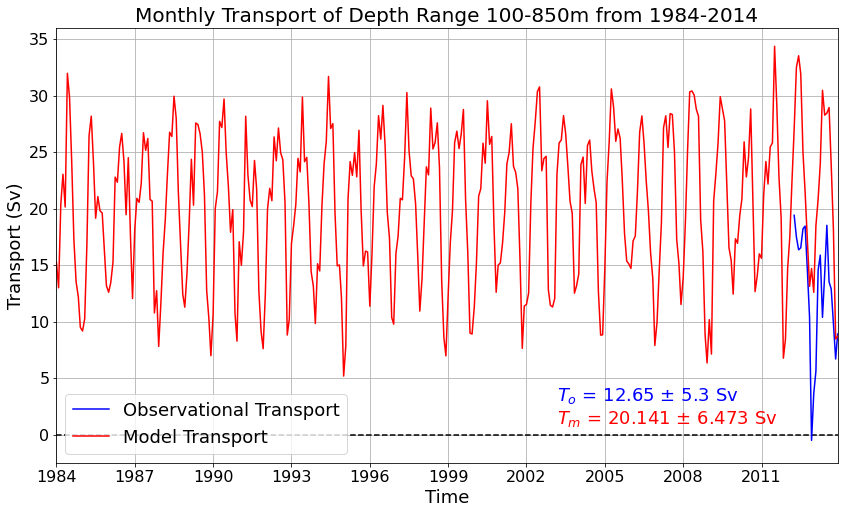

In [14]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set_ylabel('Transport (Sv)', fontsize=18)
ax.set_xlabel('Time', fontsize=18)
label1 = 'Observational Transport'
label2 = 'Model Transport'
ax.plot([times2[0],times2[-1]], [0,0], 'k--')
ax.plot(times1, obs_trans, 'b', label=label1)
ax.plot(times2, model_trans, 'r', label=label2)
ax.text(times2[230], 3, f'$T_o$ = {obsmean} $\pm$ {obsstd} Sv', color='b', fontsize=18)
ax.text(times2[230], 1, f'$T_m$ = {modelmean} $\pm$ {modelstd} Sv', color='r', fontsize=18)
ax.set_ylim(-2.5,36)
ax.set_xlim(times2[0], times2[-1])
plt.xticks(times4, times4l, color='k', size=16)
plt.yticks(np.arange(0,36,5), np.arange(0,36,5), color='k', size=16)
ax.grid(True)
ax.legend(fontsize=18)
plt.title('Monthly Transport of Depth Range 100-850m from 1984-2014', fontsize=20)
plt.savefig('longts100.png')

## 850-2500m Plot

In [15]:
model_trans = np.array([])
obs_trans = np.array([])
count = 0
with open('Data Files/mtrans850-2500.csv', 'r', newline='') as f:
    reader = csv.reader(f)
    
    for row in reader:
        model_trans = np.append(model_trans,row[2])
        
        if count>339:
            obs_trans = np.append(obs_trans,row[3])
        
        count+=1

In [16]:
model_trans = np.asarray(model_trans[1:], dtype=np.float64, order='C')
obs_trans = np.asarray(obs_trans, dtype=np.float64, order='C')

In [17]:
modelmean = round(model_trans.mean(),3)
modelstd = round(model_trans.std(),3)
obsmean = round(obs_trans.mean(),3)
obsstd = round(obs_trans.std(),3)

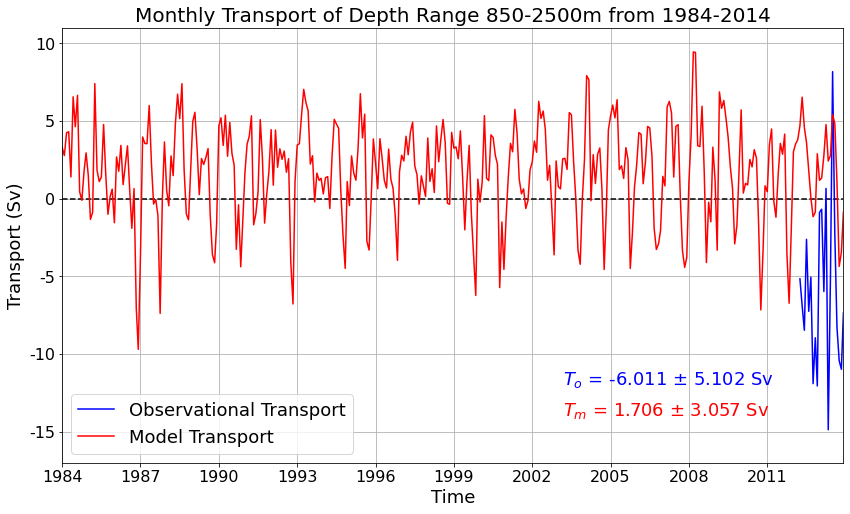

In [18]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set_ylabel('Transport (Sv)', fontsize=18)
ax.set_xlabel('Time', fontsize=18)
label1 = 'Observational Transport'
label2 = 'Model Transport'
ax.plot([times2[0],times2[-1]], [0,0], 'k--')
ax.plot(times1, obs_trans, 'b', label=label1)
ax.plot(times2, model_trans, 'r', label=label2)
ax.text(times2[230], -12, f'$T_o$ = {obsmean} $\pm$ {obsstd} Sv', color='b', fontsize=18)
ax.text(times2[230], -14, f'$T_m$ = {modelmean} $\pm$ {modelstd} Sv', color='r', fontsize=18)
ax.set_ylim(-17,11)
ax.set_xlim(times2[0], times2[-1])
plt.xticks(times4, times4l, color='k', size=16)
plt.yticks(np.arange(-15,11,5), np.arange(-15,11,5), color='k', size=16)
ax.grid(True)
ax.legend(fontsize=18)
plt.title('Monthly Transport of Depth Range 850-2500m from 1984-2014', fontsize=20)
plt.savefig('longts850.png')

## All Depths Plot

In [19]:
model_trans = np.array([])
obs_trans = np.array([])
count = 0
with open('Data Files/mtrans_all.csv', 'r', newline='') as f:
    reader = csv.reader(f)
    
    for row in reader:
        model_trans = np.append(model_trans,row[2])
        
        if count>339:
            obs_trans = np.append(obs_trans,row[3])
        
        count+=1

In [20]:
model_trans = np.asarray(model_trans[1:], dtype=np.float64, order='C')
obs_trans = np.asarray(obs_trans, dtype=np.float64, order='C')

In [21]:
modelmean = round(model_trans.mean(),3)
modelstd = round(model_trans.std(),3)
obsmean = round(obs_trans.mean(),3)
obsstd = round(obs_trans.std(),3)

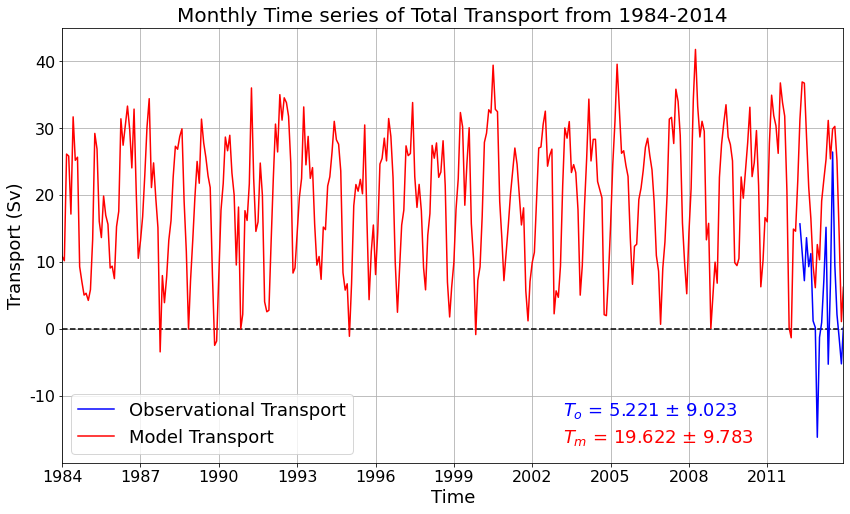

In [22]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set_ylabel('Transport (Sv)', fontsize=18)
ax.set_xlabel('Time', fontsize=18)
label1 = 'Observational Transport'
label2 = 'Model Transport'
ax.plot([times2[0],times2[-1]], [0,0], 'k--')
ax.plot(times1, obs_trans, 'b', label=label1)
ax.plot(times2, model_trans, 'r', label=label2)
ax.text(times2[230], -13, f'$T_o$ = {obsmean} $\pm$ {obsstd}', color='b', fontsize=18)
ax.text(times2[230], -17, f'$T_m$ = {modelmean} $\pm$ {modelstd}', color='r', fontsize=18)
ax.set_ylim(-20,45)
ax.set_xlim(times2[0], times2[-1])
plt.xticks(times4, times4l, color='k', size=16)
plt.yticks(np.arange(-10,42,10), np.arange(-10,42,10), color='k', size=16)
ax.grid(True)
ax.legend(fontsize=18)
plt.title('Monthly Time series of Total Transport from 1984-2014', fontsize=20)
plt.savefig('longtsall.png')